# File handling tools

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
sys.path.append("../")
import py.fileHandling as fh
from py.config import cfg
import py.logs as logs
import py.vidRead as vr
import py.vidMorph as vm
from py.imshow import imshow
LOGGERDEFINED = logs.openLog('fileHandling.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

In [3]:
import cv2 as cv
import numpy as np
import imutils
import random as rng

In [4]:
t = fh.Test(os.path.join(cfg.path.vids, '210616 mineralS LapRDT', 'M4S_3.50T_p4'))

In [6]:
t.prnt()

Droplet: {'base': 'mineral oil', 'rheModifier': 'fumed silica', 'surfactant': 'Span 20', 'rheWt': 4.0}
Matrix: {'base': 'water', 'rheModifier': 'Laponite RD', 'surfactant': 'Tween 80', 'rheWt': 3.5}
Profile:     mode  gap strain rate freq direction time
0   stdy  500    n/a    1  n/a        cw    8
1   stdy  500    n/a    2  n/a       acw    6
2   stdy  500    n/a    3  n/a        cw    4
3   stdy  500    n/a    4  n/a       acw    3
4   stdy  500    n/a    5  n/a        cw    2
5   stdy  500    n/a    6  n/a       acw    2
6   stdy  500    n/a    8  n/a        cw    2
7   stdy  500    n/a   10  n/a       acw    2
8   stdy  500    n/a   12  n/a        cw    2
9   stdy  500    n/a   16  n/a       acw    1
10  stdy  500    n/a   20  n/a        cw    1
11  stdy  500    n/a   30  n/a       acw    1
12  stdy  500    n/a   40  n/a        cw    1
13  stdy  500    n/a   50  n/a       acw    1
Videos: ['Basler acA2040-90uc (21726010)_20210616_141619152.mp4', 'Basler acA2040-90uc (21726010)_2021

In [5]:
vi = vr.vidInfo(t.videos[1])

In [220]:
vi.readFrames(startFrame=0, reportFreq=100)
vi.dropletTab

INFO: Analyzing frame 1
INFO: Analyzing frame 101
INFO: Analyzing frame 201
INFO: Analyzing frame 301
INFO: Analyzing frame 401
INFO: Analyzing frame 501
INFO: Analyzing frame 601
INFO: Analyzing frame 701
INFO: Analyzing frame 801
INFO: Analyzing frame 901
INFO: Analyzing frame 1001
INFO: Analyzing frame 1101


,frame,time,dropNum,x,y,dpos,v,w,l,angle
0,1.0,0.02,0,695.171387,283.058929,0,0,142.075867,180.763458,170.718811
1,2.0,0.04,0,695.229736,283.092163,0.0671502,3.35751,142.037567,180.616379,170.802322
2,3.0,0.06,0,695.186096,283.103821,0.0451704,2.25852,142.039795,180.440109,170.738113
3,4.0,0.08,0,695.128662,283.044830,-0.082332,-4.1166,142.097931,180.149475,170.714401
4,5.0,0.10,0,695.156555,283.037598,-0.0288155,-1.44078,142.103699,179.966110,170.780701
...,...,...,...,...,...,...,...,...,...,...
792,1060.0,21.20,19,834.426025,903.558472,-173.192,-8659.59,81.532928,108.825516,3.180353
793,1061.0,21.22,19,828.482910,727.884094,-175.775,-8788.74,79.735794,107.687126,175.955460
794,1062.0,21.24,19,815.008667,553.108704,-175.294,-8764.7,79.850609,107.526505,173.222305
795,1063.0,21.26,19,792.498840,376.704620,-177.834,-8891.72,80.008804,107.054138,170.428741


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def cubehelix1(val:float):
    '''val should be 0-1. returns a color'''
    cm = sns.cubehelix_palette(as_cmap=True, rot=-0.4)
    return cm(val)

In [306]:
vi.relabeledDroplets.dropNum.unique()

array([0, 3, 6, 10, 11.0, 16.0, 17.0], dtype=object)

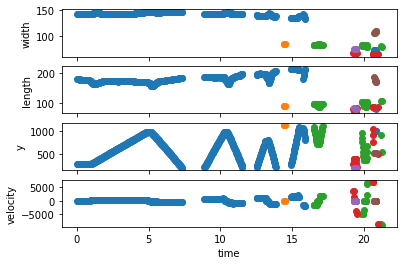

In [307]:
vi.consolidateDroplets()
fig, axs = plt.subplots(4,1, sharex=True)
axs[0].set_ylabel('width')
axs[1].set_ylabel('length')
axs[2].set_ylabel('y')
axs[3].set_ylabel('velocity')
axs[3].set_xlabel('time')

for n in vi.relabeledDroplets.dropNum.unique():
    color = cubehelix1(n/8)
    d0 = vi.relabeledDroplets[vi.relabeledDroplets['dropNum']==n]
    d0 = d0[(d0['v']>0)|(d0['v']<0)]
    d0 = d0[d0['time']>0]
    d1 = vr.removeOutliers(d0, 'w')
    d1 = vr.removeOutliers(d0, 'v')
    axs[0].scatter(d1['time'],d1['w'], label=n)
    axs[1].scatter(d1['time'], d1['l'], label=n)
    axs[2].scatter(d1['time'], d1['y'], label=n)
    axs[3].scatter(d1['time'], d1['v'], label=n)

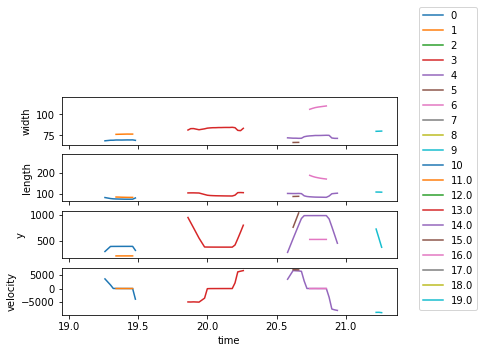

In [298]:
fig, axs = plt.subplots(4,1, sharex=True)
axs[0].set_ylabel('width')
axs[1].set_ylabel('length')
axs[2].set_ylabel('y')
axs[3].set_ylabel('velocity')
axs[3].set_xlabel('time')

for n in vi.dropletTab['dropNum'].unique():
    color = cubehelix1(n/8)
    d0 = vi.dropletTab[vi.dropletTab['dropNum']==n]
    d0 = d0[(d0['v']>0)|(d0['v']<0)]
    d0 = d0[d0['time']>19]
    d1 = vr.removeOutliers(d0, 'w')
    d1 = vr.removeOutliers(d0, 'v')
    axs[0].plot(d1['time'],d1['w'], label=n)
    axs[1].plot(d1['time'], d1['l'], label=n)
    axs[2].plot(d1['time'], d1['y'], label=n)
    axs[3].plot(d1['time'], d1['v'], label=n)
axs[3].legend(bbox_to_anchor=(1.05, 0), loc='lower left')

In [225]:
d0 = vi.dropletTab
# d0[(d0['frame']>1030)&(d0['frame']<1039)]
d0[(d0['time']>19.2)&(d0['time']<19.5)]

,frame,time,dropNum,x,y,dpos,v,w,l,angle
701,962.0,19.24,10,508.473053,224.926376,0,0,68.628769,81.904335,169.838013
702,963.0,19.26,10,520.219299,294.899017,70.9517,3547.59,68.373039,81.443436,171.606506
703,964.0,19.28,10,531.832397,366.327667,72.3665,3618.33,68.296768,81.191185,173.027084
704,965.0,19.30,10,534.996338,392.558533,26.421,1321.05,69.046028,76.690323,172.793869
705,965.0,19.30,11,416.379120,209.098114,0,0,75.647957,86.856880,168.347321
706,966.0,19.32,10,535.040405,393.197968,0.640951,32.0476,69.068932,75.304665,172.537308
707,966.0,19.32,11,416.422577,209.591507,0.495303,24.7652,75.940063,84.896416,167.823227
708,967.0,19.34,10,534.964661,393.481995,0.293953,14.6977,69.333611,74.641830,172.573349
709,967.0,19.34,11,416.421967,209.938583,0.347077,17.3538,76.098091,83.866783,167.339371
710,968.0,19.36,10,534.891724,393.672852,0.204319,10.2159,69.320251,74.304016,171.879349


[((534.8917236328125, 393.6728515625),
  (69.32025146484375, 74.30401611328125),
  171.8793487548828),
 ((416.3009033203125, 210.1257781982422),
  (76.18468475341797, 83.56455993652344),
  167.1087646484375)]

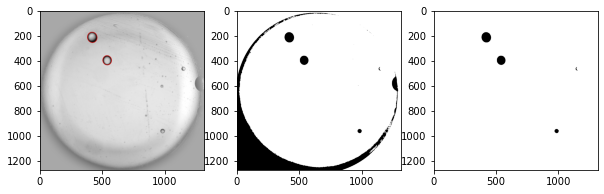

In [228]:
vi.detectDropletOneFrame(frameNum=968, diag=True)

[((556.7822875976562, 1037.4691162109375),
  (66.49737548828125, 87.31258392333984),
  2.0882067680358887),
 ((492.5328369140625, 803.4964599609375),
  (71.34639739990234, 100.98430633544922),
  178.093994140625)]

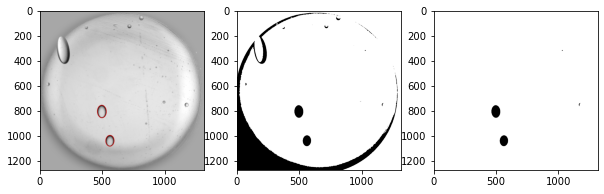

In [203]:
vi.detectDropletOneFrame(frameNum=1033, diag=True)

[((491.850341796875, 930.44677734375),
  (71.4026107788086, 100.15478515625),
  0.11205952614545822)]

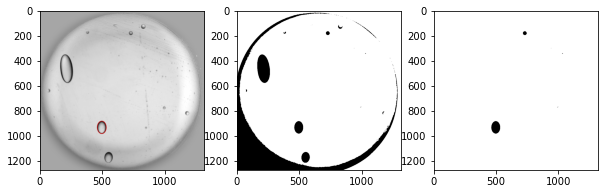

In [168]:
vi.detectDropletOneFrame(frameNum=1034, diag=True)

[((489.53369140625, 985.799072265625),
  (73.25592041015625, 89.68673706054688),
  0.6995490789413452),
 ((219.6730194091797, 527.1865844726562),
  (101.98743438720703, 209.23704528808594),
  175.41336059570312)]

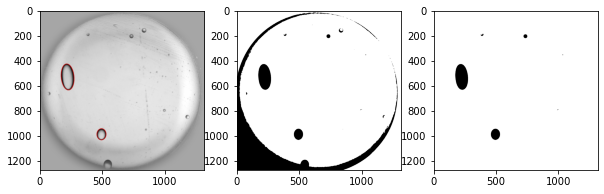

In [169]:
vi.detectDropletOneFrame(frameNum=1035, diag=True)

[((489.5310974121094, 986.162353515625),
  (73.90874481201172, 86.44408416748047),
  0.3301493227481842),
 ((219.83343505859375, 527.5764770507812),
  (104.43096923828125, 195.358642578125),
  175.43075561523438)]

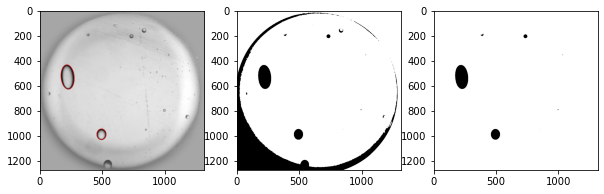

In [170]:
vi.detectDropletOneFrame(frameNum=1036, diag=True)

In [117]:
vi.dropletTab['v'].mean()

72.7603751966611

In [118]:
vi.bounds

[autoreload of py.vidRead failed: Traceback (most recent call last):
  File "C:\Users\lmf1\Miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\lmf1\Miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\lmf1\Miniconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\lmf1\Miniconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "..\py\vidRead.py", line 139
    if self.prevDroplets['y'

{'x0': 271,
 'xf': 1586,
 'y0': 610,
 'yf': 1882,
 'r': 647,
 'xc': 928,
 'yc': 1246,
 'xcc': 657,
 'ycc': 636}

In [119]:
r = vi.dropletTab.loc[1]
type(r)

[autoreload of py.vidRead failed: Traceback (most recent call last):
  File "C:\Users\lmf1\Miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\lmf1\Miniconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\lmf1\Miniconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\lmf1\Miniconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "..\py\vidRead.py", line 128
    def dropletChange(self, 

pandas.core.series.Series

In [123]:
prevYMax = vi.dropletTab['y'].idxmax()
vi.dropletTab.loc[prevYMax, 'y']

1124.251953125

In [124]:
l1 = [2,65,7,2,1]
l1<3

TypeError: '<' not supported between instances of 'list' and 'int'

In [129]:
l1 = [False, False, True, True]
dt = vi.dropletTab.loc[0:3]
dred = dt.loc[l1]
dred.iloc[1].name

3

In [180]:
dred[dred['dropNum']==0].iloc[0].name

2

In [183]:
dred.index

Int64Index([2, 3], dtype='int64')

In [233]:
d1 = d0[(d0['frame']<2)|(d0['frame']>1060)]

In [241]:
mask = d0['time']==21.24
d0.loc[mask, 'time'] = 100
d0

,frame,time,dropNum,x,y,dpos,v,w,l,angle
792,1060.0,21.20,19,834.426025,903.558472,-173.192,-8659.59,81.532928,108.825516,3.180353
793,1061.0,21.22,19,828.482910,727.884094,-175.775,-8788.74,79.735794,107.687126,175.955460
794,1062.0,100.00,19,815.008667,553.108704,-175.294,-8764.7,79.850609,107.526505,173.222305
795,1063.0,21.26,19,792.498840,376.704620,-177.834,-8891.72,80.008804,107.054138,170.428741
796,1064.0,21.28,19,762.031311,199.569794,-179.736,-8986.8,80.878311,107.579628,168.015106


In [237]:
d1

,frame,time,dropNum,x,y,dpos,v,w,l,angle
793,1061.0,21.22,19,828.482910,727.884094,-175.775,-8788.74,79.735794,107.687126,175.955460
794,1062.0,21.24,19,815.008667,553.108704,-175.294,-8764.7,79.850609,107.526505,173.222305
795,1063.0,21.26,19,792.498840,376.704620,-177.834,-8891.72,80.008804,107.054138,170.428741
796,1064.0,21.28,19,762.031311,199.569794,-179.736,-8986.8,80.878311,107.579628,168.015106
